In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/fake-and-real-news-dataset/True.csv


In [11]:
import pandas as pd
import numpy as np

In [12]:
true = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
fake['target'] = 0
true['target'] = 1
df = pd.concat([fake, true]).reset_index(drop = True)
from sklearn.utils import shuffle
df = shuffle(df)

In [14]:
y = df['target']
x = df.drop('target', axis=1)

In [15]:
df.shape

(44898, 5)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,HashingVectorizer

In [18]:
df = df.dropna()
news = df.copy()

In [23]:
news.reset_index(inplace=True)

In [29]:
news['text'][2]
len(news)

44898

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re 
ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review =re.sub('[^a-zA-Z]',' ',news['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [33]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [35]:
X.shape

(44898, 5000)

In [38]:
y = news['target']

In [39]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [40]:
cv.get_feature_names()[:10]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil']

In [41]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [45]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())
count_df.head(4)

,abadi,abandon,abba,abc,abc news,abdullah,abe,abedin,abid,abil,...,youtub,youtub com,youtub com watch,zealand,zero,zika,zimbabw,zone,zor,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
import matplotlib.pyplot as plt

**MultinomialNB Algorithm**

In [47]:
from sklearn import metrics
import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [48]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy:   0.962


Confusion matrix, without normalization
[[7524  341]
 [ 225 6727]]
Normalized confusion matrix
[[0.95664336 0.04335664]
 [0.03236479 0.96763521]]


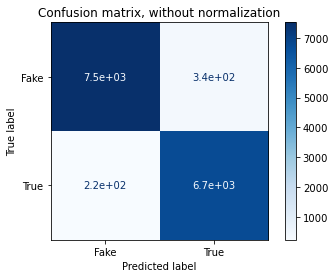

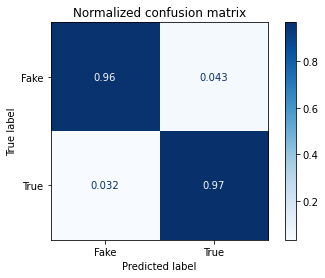

In [53]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Fake','True']
# Plot non-normalized confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [54]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.961800634406425

**Passive Aggressive Classifier Algorithm**

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [58]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy:   0.995


Confusion matrix, without normalization
[[7822   43]
 [  31 6921]]
Normalized confusion matrix
[[0.99453274 0.00546726]
 [0.00445915 0.99554085]]


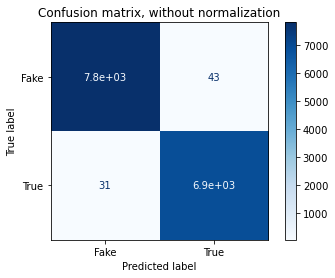

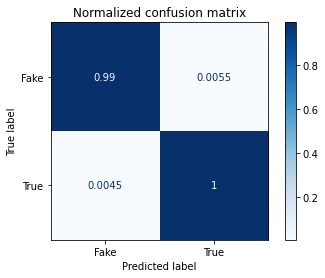

In [59]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Fake','True']
# Plot non-normalized confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(linear_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [61]:
classifier.coef_[0]

array([-9.40341692, -9.07215302, -9.59084239, ..., -8.41624419,
       -9.3641962 , -8.97045456])

In [64]:
feature_names = cv.get_feature_names()

In [65]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9067555258325406, 'said'),
 (-4.498923587893598, 'trump'),
 (-4.853990103012542, 'state'),
 (-5.03950796559886, 'would'),
 (-5.098958779952609, 'presid'),
 (-5.13731141533289, 'reuter'),
 (-5.364841359260014, 'republican'),
 (-5.3851683149567435, 'year'),
 (-5.474733469977069, 'govern'),
 (-5.6042165424257995, 'elect'),
 (-5.633711844281843, 'hous'),
 (-5.673308277849884, 'democrat'),
 (-5.679784757690543, 'unit'),
 (-5.683831921405851, 'new'),
 (-5.731591144022945, 'also'),
 (-5.7392028024193795, 'say'),
 (-5.739855270168677, 'senat'),
 (-5.764587510583848, 'peopl'),
 (-5.7804830333588075, 'parti'),
 (-5.787010408085955, 'offici')]

In [66]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-15.020188013964894, 'alex wong'),
 (-15.020188013964894, 'becom member wire'),
 (-15.020188013964894, 'boiler room'),
 (-15.020188013964894, 'cdata'),
 (-15.020188013964894, 'centuri wire'),
 (-15.020188013964894, 'centuri wire say'),
 (-15.020188013964894, 'chip somodevilla'),
 (-15.020188013964894, 'chip somodevilla getti'),
 (-15.020188013964894, 'ck'),
 (-15.020188013964894, 'com watch'),
 (-15.020188013964894, 'entir stori'),
 (-15.020188013964894, 'featur imag screenshot'),
 (-15.020188013964894, 'featur imag via'),
 (-15.020188013964894, 'filessupport'),
 (-15.020188013964894, 'filessupport wire'),
 (-15.020188013964894, 'filessupport wire subscrib'),
 (-15.020188013964894, 'finicum'),
 (-15.020188013964894, 'flickr'),
 (-15.020188013964894, 'gateway pundit'),
 (-15.020188013964894, 'getti imag'),
 (-15.020188013964894, 'henningsen'),
 (-15.020188013964894, 'http co'),
 (-15.020188013964894, 'http twitter'),
 (-15.020188013964894, 'http twitter com'),
 (-15.020188013964894, '